In [372]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


In [373]:
def add_k_sign(k, wires):
    #sign handling
    bin_rep = np.binary_repr(k,len(wires))
    print(bin_rep)
    k = int(bin_rep,2)
    
    qml.QFT(wires=wires)
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])
    qml.adjoint(qml.QFT)(wires=wires)

In [374]:
# wires_solution = [6, 7, 8, 9, 10,11,12,13]  # qubits needed to encode the solution

# dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution, shots=1000)
# # dev = qml.device('qiskit.ibmq', wires=2, backend='ibmq_qasm_simulator', ibmqx_token="XXX")

# n_wires = len(dev.wires)


In [375]:
import math
from pennylane.optimize import AdamOptimizer


num_of_qubits_test = 4
num_overflow_bit = 1
num_qubits = num_of_qubits_test + num_overflow_bit


num_of_qubits_vqs = num_qubits + 1
eps_val_q = 1/math.sqrt(2**num_of_qubits_vqs)/100
eps_val = min(1e-10, eps_val_q)
tiny_change_threshold = 1e-4
cnt_threshold_no_change = 5




test_input = [0.6, 0.3, 0.0, 0.1, 0.2, 0.0,0.0,0.2,0.0,0.4,0.3,0.0,0.4,0.5, 0.0, 0.0]
overflow_test_input = []
for i in range(2**(num_of_qubits_test+num_overflow_bit)):
    if(i<len(test_input)):
        overflow_test_input.append(test_input[i])
    else:
        overflow_test_input.append(0.0)

start_state = np.array(overflow_test_input)
start_state = start_state/np.linalg.norm(start_state)

initial_state2 = start_state.tolist()

initial_state_phi1 = initial_state2
print(f'initial_state_phi1={initial_state_phi1}')
initial_state_0_phi1  = initial_state_phi1 + [0]*len(initial_state_phi1) # 2**num_of_qubits

initial_state_phi1=[0.5477225575051661, 0.27386127875258304, 0.0, 0.09128709291752768, 0.18257418583505536, 0.0, 0.0, 0.18257418583505536, 0.0, 0.3651483716701107, 0.27386127875258304, 0.0, 0.3651483716701107, 0.4564354645876384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [376]:
device_name_standard_maker = 'default.qubit'
device_name2 = 'default.qubit' 
device_name3 = 'default.qubit' 




00000


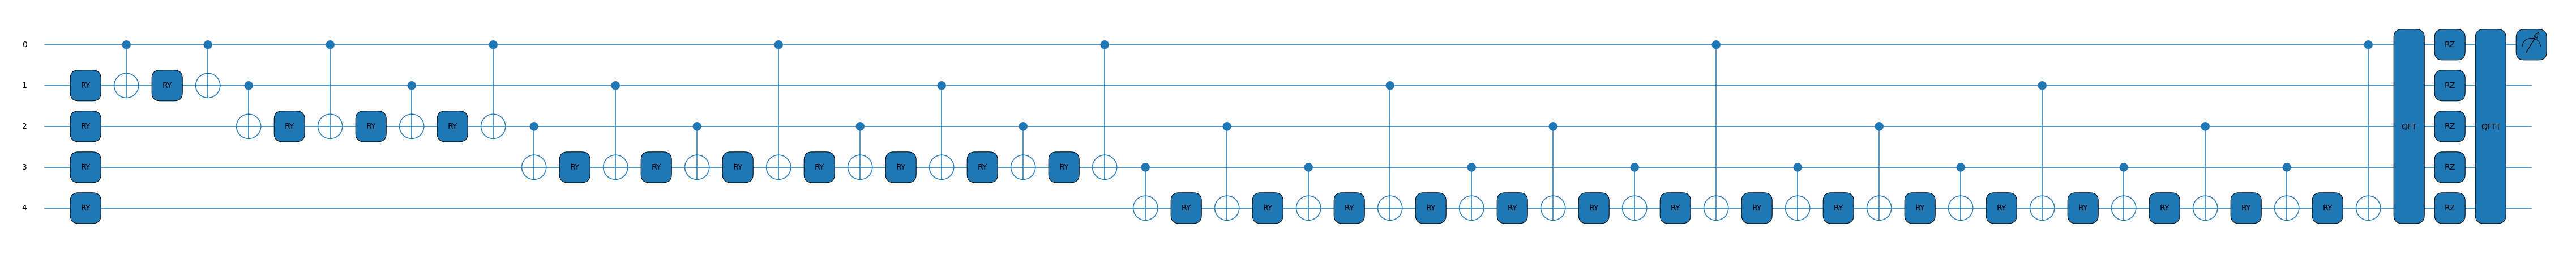

In [377]:
dev_standard_maker = qml.device(device_name_standard_maker, wires=num_qubits,shots=1024) # add some bits for handle overflow
@qml.qnode(dev_standard_maker)
def standard_maker_helper_circuit(k,input,wires):
    qml.QubitStateVector(np.array(input), wires=wires)
    add_k_sign(k,wires=wires)
    
    # return qml.probs(wires=wires)
    return qml.expval(qml.PauliZ(wires=0))


qml.draw_mpl(standard_maker_helper_circuit, show_all_wires=True)(0,start_state,dev_standard_maker.wires)
plt.show()

00000
00001
00010
00011
00100
00101
00110
00111


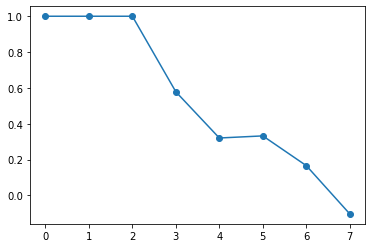

In [378]:

x=[i for i in range(0,2**(num_qubits-1-1))]
y=[]
for i in x:
    y.append(standard_maker_helper_circuit(i,start_state,dev_standard_maker.wires))

# plot scatter plot with x and y data
plt.scatter(x, y)
  
# plot with x and y data
plt.plot(x, y)

